## Bias Predictor Amazon

## Importing all required libraries

In [30]:
import numpy as np                   # For creating matrices and for number operations
import pandas as pd                  # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns                # To plot heatmaps
sns.set_style("darkgrid")                
import warnings                      # Hide warnings
warnings.filterwarnings('ignore')
%load_ext jupyternotify

In [31]:
# Loading dataset

df = pd.read_csv("Data/Primary/Amazon Hiring/Train.csv")
df.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [32]:
# Droping Unnecessory columns

df.drop(["GraduationYear" , "EmpID" , "EmpName"] , axis = 1 , inplace = True)

In [33]:
fit = pd.read_csv("Fitment Preds.csv")
fit = fit["FitmentPercent"]
fit

0       89.681420
1       91.609060
2       79.058330
3       56.139606
4       80.393370
          ...    
8740    78.249374
8741    75.718254
8742    79.756256
8743    54.553688
8744    47.126640
Name: FitmentPercent, Length: 8745, dtype: float64

In [34]:
test = pd.read_csv("Data/Primary/Amazon Hiring/Test.csv")
test["FitmentPercent"] = fit
test.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,FitmentPercent
0,5664,Theo,Native,35,Male,JR85289,PhD,Information Technology,Tier 2,5,...,2016,27,34,Single,4,SDE,Enterprise,Finance,18,89.681420
1,23568,Vernie,English,35,Male,JR85289,B.Tech,Information Technology,Tier 3,9,...,2009,29,33,Married,4,EM,Enterprise,Engineering,8,91.609060
2,21490,Wendell,English,28,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,9,...,2019,18,25,Married,3,SDE,Startup,Engineering,18,79.058330
3,8363,West,Hindi,37,Male,JR87525,MS,Computer Science,Tier 2,8,...,2010,7,12,Single,5,DS,Enterprise,Product,17,56.139606
4,6165,Alford,Hindi,36,Female,JR85289,PhD,Artificial Intelligence,Tier 2,7,...,2015,22,32,Married,4,SDE,Startup,Engineering,9,80.393370


In [35]:
test.drop(["GraduationYear" , "EmpID" , "EmpName"] , axis = 1 , inplace = True)

In [36]:
cats = df.select_dtypes(include="object").columns.to_list()
cats

['LanguageOfCommunication',
 'Gender',
 'JobProfileIDApplyingFor',
 'HighestDegree',
 'DegreeBranch',
 'GraduatingInstitute',
 'MartialStatus',
 'CurrentDesignation',
 'CurrentCompanyType',
 'DepartmentInCompany',
 'BiasInfluentialFactor']

In [37]:
ints = df.select_dtypes(exclude="object").columns.to_list()
ints

['Age',
 'LatestDegreeCGPA',
 'YearsOfExperince',
 'CurrentCTC',
 'ExpectedCTC',
 'EmpScore',
 'TotalLeavesTaken',
 'FitmentPercent']

In [38]:
for i in ints:
    df[i] = np.log(df[i] + 1)

In [39]:
for i in ints:
    test[i] = np.log(test[i] + 1)

In [40]:
df.dropna(subset = ["BiasInfluentialFactor"] , inplace = True)

In [41]:
cats.pop()

'BiasInfluentialFactor'

In [42]:
df.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,English,3.583519,Male,JR85289,B.Tech,Electrical,Tier 1,2.079442,2.564949,3.091042,3.295837,Married,1.791759,SSE,Enterprise,Design,3.044522,YearsOfExperince,4.568506
2,English,3.610918,Female,JR87525,PhD,Computer Science,Tier 1,1.945910,1.945910,2.772589,3.218876,Single,1.791759,SDE,MidSized,Engineering,2.995732,Gender,4.524611
3,English,3.401197,Female,JR87525,BCA,Information Technology,Tier 2,1.791759,1.945910,2.833213,3.218876,Married,1.791759,SDE,Startup,Product,2.833213,Gender,4.294424
4,English,3.258097,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,2.197225,1.098612,3.218876,3.496508,Married,1.791759,SDE,Enterprise,Engineering,2.397895,DegreeBranch,4.469809
5,Native,3.583519,Male,JR88879,BCA,Computer Science,Tier 2,2.302585,2.564949,3.258097,3.401197,Married,1.609438,DS,MidSized,Engineering,2.397895,YearsOfExperince,4.545739


In [43]:
test.head()

,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,FitmentPercent
0,Native,3.583519,Male,JR85289,PhD,Information Technology,Tier 2,1.791759,1.791759,3.332205,3.555348,Single,1.609438,SDE,Enterprise,Finance,2.944439,4.507352
1,English,3.583519,Male,JR85289,B.Tech,Information Technology,Tier 3,2.302585,2.564949,3.401197,3.526361,Married,1.609438,EM,Enterprise,Engineering,2.197225,4.528387
2,English,3.367296,Male,JR87525,M.Tech,Artificial Intelligence,Tier 2,2.302585,1.098612,2.944439,3.258097,Married,1.386294,SDE,Startup,Engineering,2.944439,4.382755
3,Hindi,3.637586,Male,JR87525,MS,Computer Science,Tier 2,2.197225,2.484907,2.079442,2.564949,Single,1.791759,DS,Enterprise,Product,2.890372,4.045498
4,Hindi,3.610918,Female,JR85289,PhD,Artificial Intelligence,Tier 2,2.079442,1.945910,3.135494,3.496508,Married,1.609438,SDE,Startup,Engineering,2.302585,4.399294


In [44]:
cats

['LanguageOfCommunication',
 'Gender',
 'JobProfileIDApplyingFor',
 'HighestDegree',
 'DegreeBranch',
 'GraduatingInstitute',
 'MartialStatus',
 'CurrentDesignation',
 'CurrentCompanyType',
 'DepartmentInCompany']

In [45]:
df = pd.get_dummies(df , columns = cats , prefix = cats , drop_first = True)

In [46]:
test = pd.get_dummies(test , columns = cats , prefix = cats , drop_first = True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10309 entries, 0 to 13644
Data columns (total 49 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      10309 non-null  float64
 1   LatestDegreeCGPA                         10309 non-null  float64
 2   YearsOfExperince                         10309 non-null  float64
 3   CurrentCTC                               10309 non-null  float64
 4   ExpectedCTC                              10309 non-null  float64
 5   EmpScore                                 10309 non-null  float64
 6   TotalLeavesTaken                         10309 non-null  float64
 7   BiasInfluentialFactor                    10309 non-null  object 
 8   FitmentPercent                           10309 non-null  float64
 9   LanguageOfCommunication_Hindi            10309 non-null  uint8  
 10  LanguageOfCommunication_Native           10309

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 48 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      8745 non-null   float64
 1   LatestDegreeCGPA                         8745 non-null   float64
 2   YearsOfExperince                         8745 non-null   float64
 3   CurrentCTC                               8745 non-null   float64
 4   ExpectedCTC                              8745 non-null   float64
 5   EmpScore                                 8745 non-null   float64
 6   TotalLeavesTaken                         8745 non-null   float64
 7   FitmentPercent                           8745 non-null   float64
 8   LanguageOfCommunication_Hindi            8745 non-null   uint8  
 9   LanguageOfCommunication_Native           8745 non-null   uint8  
 10  Gender_Male                              8745 no

In [49]:
from sklearn.model_selection import train_test_split
X = df.drop(["BiasInfluentialFactor"] , axis = 1)
y = df["BiasInfluentialFactor"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(8247, 2062, 8247, 2062)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train[ints] = scaler1.fit_transform(X_train[ints])
X_test[ints] = scaler1.transform(X_test[ints])

In [51]:
test[ints] = scaler1.transform(test[ints])

In [52]:
X_train.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,...,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
10883,1.101949,-0.021633,0.746480,-0.922216,-1.465832,0.522811,-0.201719,-1.640178,0,0,...,0,0,0,1,0,0,0,1,0,0
1691,-1.234287,-0.021633,-0.902315,-1.348752,-1.084053,1.235160,-0.954541,-0.777332,0,0,...,0,1,0,0,0,1,1,0,0,0
11427,-1.540772,-0.021633,-1.419977,0.886638,1.071380,-1.473038,1.211561,-0.561875,1,0,...,1,0,0,0,0,1,0,0,0,0
771,0.395339,-0.021633,-1.419977,-2.183183,-2.138867,-0.349034,1.326900,0.896506,0,1,...,0,0,0,0,0,1,1,0,0,0
297,-1.540772,-2.609680,-1.419977,0.272845,0.107878,-1.473038,-2.065624,0.613963,1,0,...,1,0,0,0,0,0,0,1,0,0


In [54]:
test.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,...,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,1.101949,-1.605738,-0.172712,1.060012,1.071380,0.522811,1.090304,0.858740,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1.101949,1.207093,1.218584,1.221419,0.977421,0.522811,-0.676103,1.039868,0,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.653976,1.207093,-1.419977,0.152846,0.107878,-0.349034,1.090304,-0.214165,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1.541023,0.626932,1.074553,-1.870790,-2.138867,1.235160,0.962490,-3.118296,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1.324453,-0.021633,0.104671,0.599814,0.880656,0.522811,-0.427032,-0.071754,1,0,...,0,1,0,0,0,1,0,1,0,0


In [55]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix , roc_auc_score , f1_score , accuracy_score , classification_report , roc_curve , auc , plot_roc_curve
from sklearn.model_selection import cross_val_score

In [62]:
models = []
models.append(['XGBClassifier', XGBClassifier(random_state = 42 , eval_metric='mlogloss')])
models.append(['AdaBoostClassifier', AdaBoostClassifier(random_state = 42)])
models.append(['RandomForest', RandomForestClassifier(random_state = 42)])
models.append(['Logistic Regression', LogisticRegression(random_state = 42)])
models.append(['KNeigbors', KNeighborsClassifier()])

In [63]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    # roc = roc_auc_score(y_test , preds , multi_class='ovr' , average = "weighted")
    # fpr, tpr, thresholds = roc_curve(y_test, preds)
    # ac = auc(fpr, tpr)
    f1 = f1_score(y_test , preds , average = "weighted")
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (20 , 10))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    # print(f"ROC AUC Score: {roc:.4f}")
    # print('\n')
    
    print(f"F1 Score: {f1:.4f}")
    print("\n")
    
    # print(f"AUC : {ac:.4f}")
    # print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")

    # plt.figure(figsize = (10, 8))
    # plot_roc_curve(model[1], X_test, y_test , color = '#FF4500')
    # plt.plot([0, 1], [0, 1], linestyle = '--', color = '#7CFC00')
    # plt.show()
    # print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    # sam.append(roc)
    sam.append(f1)
    # sam.append(ac)
    
    return sam , mod



XGBClassifier


Confusion matrix : 



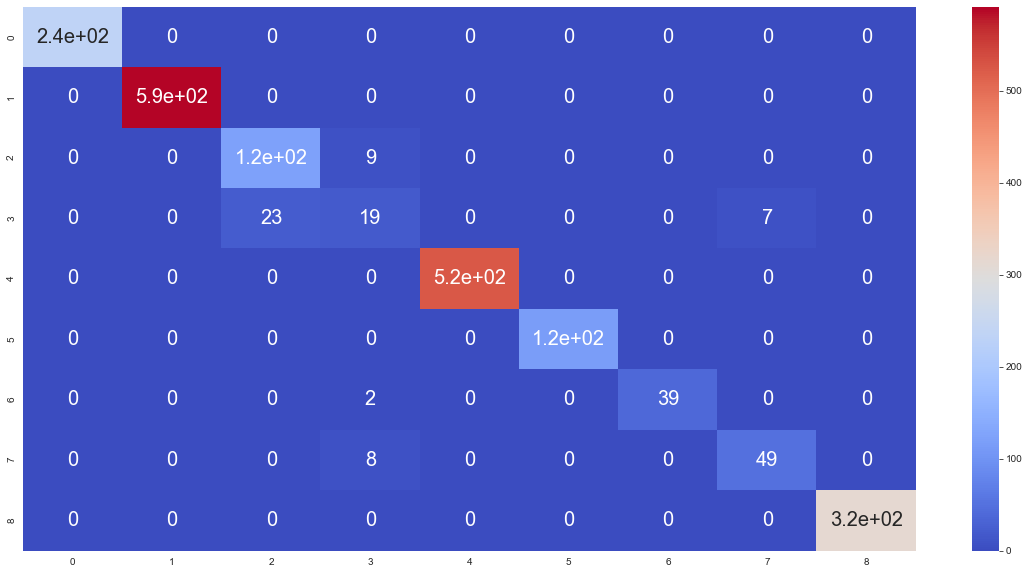



Training score : 1.0000


Test Score : 0.9762


K-fold accuracy : 0.9693


Standard Deviation of Accuracies in k-fold : 0.0047


F1 Score: 0.9751


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       1.00      1.00      1.00       235
      DegreeBranch       1.00      1.00      1.00       591
          EmpScore       0.84      0.93      0.88       132
        Ethinicity       0.50      0.39      0.44        49
            Gender       1.00      1.00      1.00       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       1.00      0.95      0.97        41
     MartialStatus       0.88      0.86      0.87        57
  YearsOfExperince       1.00      1.00      1.00       315

          accuracy                           0.98      2062
         macro avg       0.91      0.90      0.91      2062
      weighted avg       0.97      0.98      0.98      2062








AdaBoostClassifier


Confusion mat

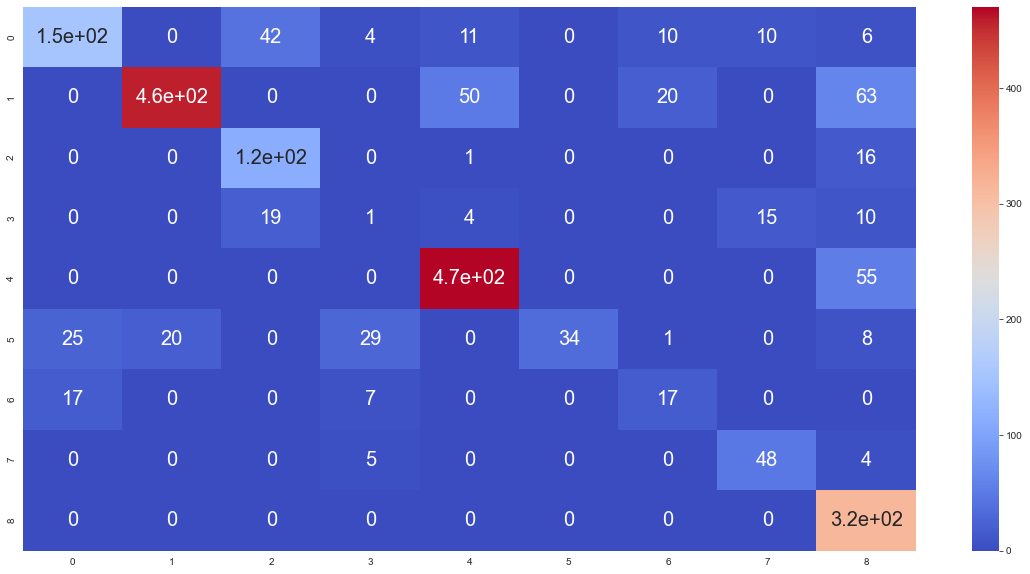



Training score : 0.7640


Test Score : 0.7808


K-fold accuracy : 0.7286


Standard Deviation of Accuracies in k-fold : 0.0564


F1 Score: 0.7753


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.78      0.65      0.71       235
      DegreeBranch       0.96      0.77      0.86       591
          EmpScore       0.65      0.87      0.75       132
        Ethinicity       0.02      0.02      0.02        49
            Gender       0.88      0.90      0.89       525
     HighestDegree       1.00      0.29      0.45       117
  LatestDegreeCGPA       0.35      0.41      0.38        41
     MartialStatus       0.66      0.84      0.74        57
  YearsOfExperince       0.66      1.00      0.80       315

          accuracy                           0.78      2062
         macro avg       0.66      0.64      0.62      2062
      weighted avg       0.81      0.78      0.78      2062








RandomForest


Confusion matrix : 

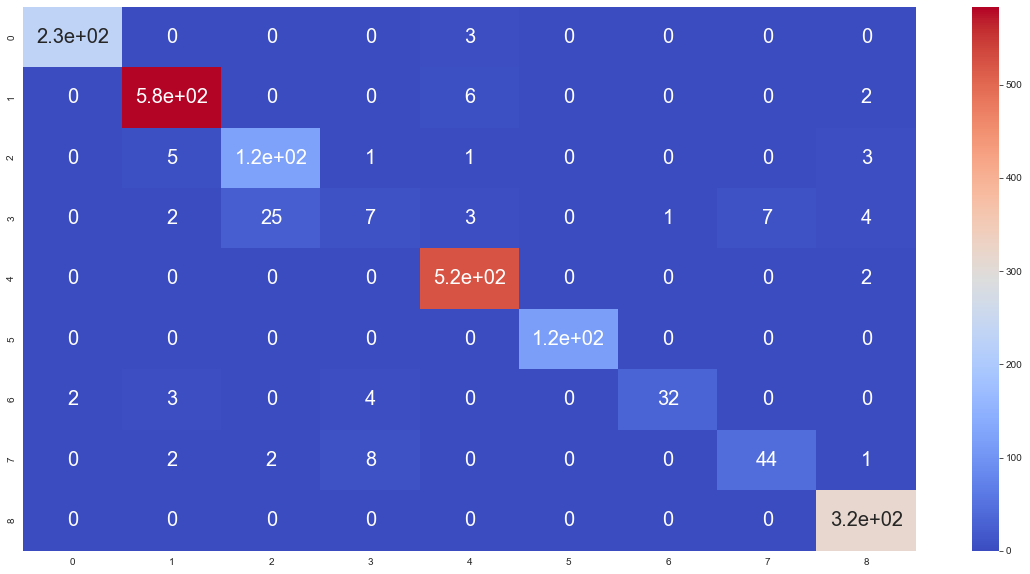



Training score : 1.0000


Test Score : 0.9578


K-fold accuracy : 0.9489


Standard Deviation of Accuracies in k-fold : 0.0046


F1 Score: 0.9523


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.99      0.99      0.99       235
      DegreeBranch       0.98      0.99      0.98       591
          EmpScore       0.82      0.92      0.87       132
        Ethinicity       0.35      0.14      0.20        49
            Gender       0.98      1.00      0.99       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       0.97      0.78      0.86        41
     MartialStatus       0.86      0.77      0.81        57
  YearsOfExperince       0.96      1.00      0.98       315

          accuracy                           0.96      2062
         macro avg       0.88      0.84      0.85      2062
      weighted avg       0.95      0.96      0.95      2062








Logistic Regression


Confusion ma

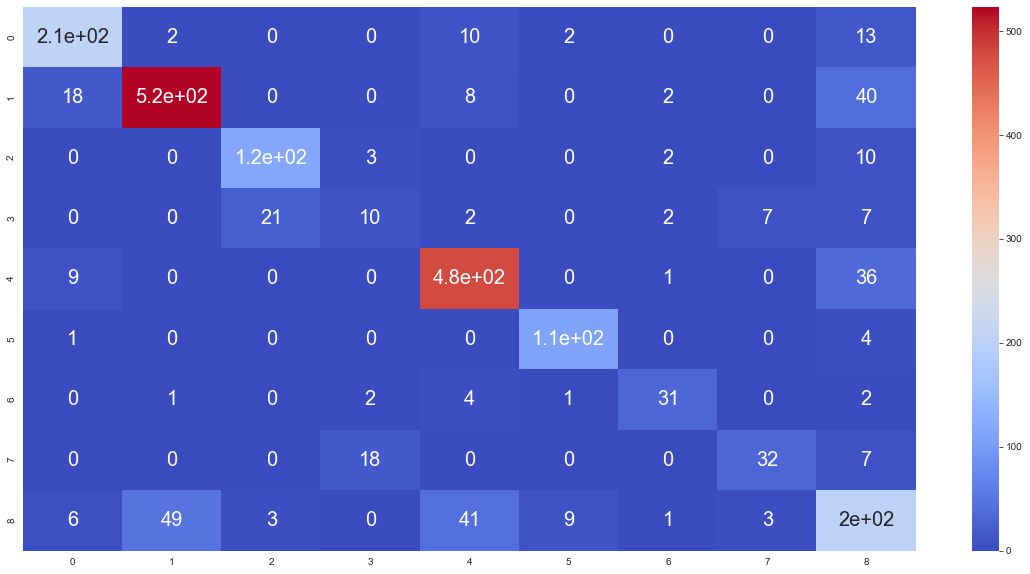



Training score : 0.8484


Test Score : 0.8317


K-fold accuracy : 0.8304


Standard Deviation of Accuracies in k-fold : 0.0137


F1 Score: 0.8287


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.86      0.89      0.87       235
      DegreeBranch       0.91      0.88      0.90       591
          EmpScore       0.83      0.89      0.86       132
        Ethinicity       0.30      0.20      0.24        49
            Gender       0.88      0.91      0.90       525
     HighestDegree       0.90      0.96      0.93       117
  LatestDegreeCGPA       0.79      0.76      0.77        41
     MartialStatus       0.76      0.56      0.65        57
  YearsOfExperince       0.63      0.64      0.64       315

          accuracy                           0.83      2062
         macro avg       0.76      0.74      0.75      2062
      weighted avg       0.83      0.83      0.83      2062








KNeigbors


Confusion matrix : 



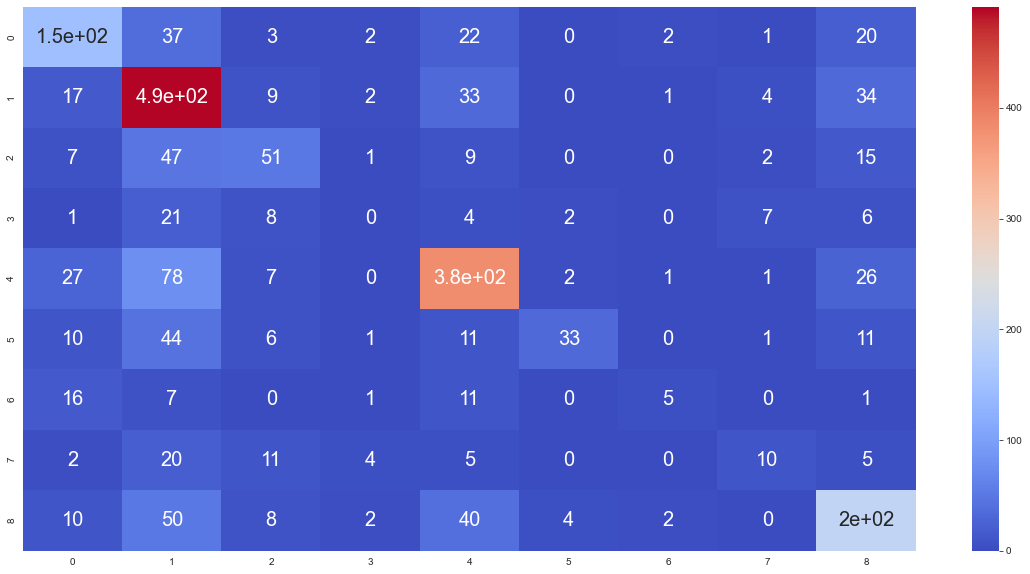



Training score : 0.7897


Test Score : 0.6402


K-fold accuracy : 0.6327


Standard Deviation of Accuracies in k-fold : 0.0132


F1 Score: 0.6196


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.62      0.63      0.63       235
      DegreeBranch       0.62      0.83      0.71       591
          EmpScore       0.50      0.39      0.43       132
        Ethinicity       0.00      0.00      0.00        49
            Gender       0.74      0.73      0.73       525
     HighestDegree       0.80      0.28      0.42       117
  LatestDegreeCGPA       0.45      0.12      0.19        41
     MartialStatus       0.38      0.18      0.24        57
  YearsOfExperince       0.63      0.63      0.63       315

          accuracy                           0.64      2062
         macro avg       0.53      0.42      0.44      2062
      weighted avg       0.63      0.64      0.62      2062






Wall time: 2min 25s


In [64]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [72]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
y_train.value_counts()

DegreeBranch          2267
Gender                2080
YearsOfExperince      1246
CurrentCompanyType     939
EmpScore               527
HighestDegree          465
Ethinicity             279
MartialStatus          223
LatestDegreeCGPA       221
Name: BiasInfluentialFactor, dtype: int64

In [73]:
X_train_1, y_train_1 = oversample.fit_resample(X_train , y_train)
y_train_1.value_counts()

MartialStatus         2267
CurrentCompanyType    2267
HighestDegree         2267
DegreeBranch          2267
Gender                2267
YearsOfExperince      2267
EmpScore              2267
LatestDegreeCGPA      2267
Ethinicity            2267
Name: BiasInfluentialFactor, dtype: int64



XGBClassifier


Confusion matrix : 



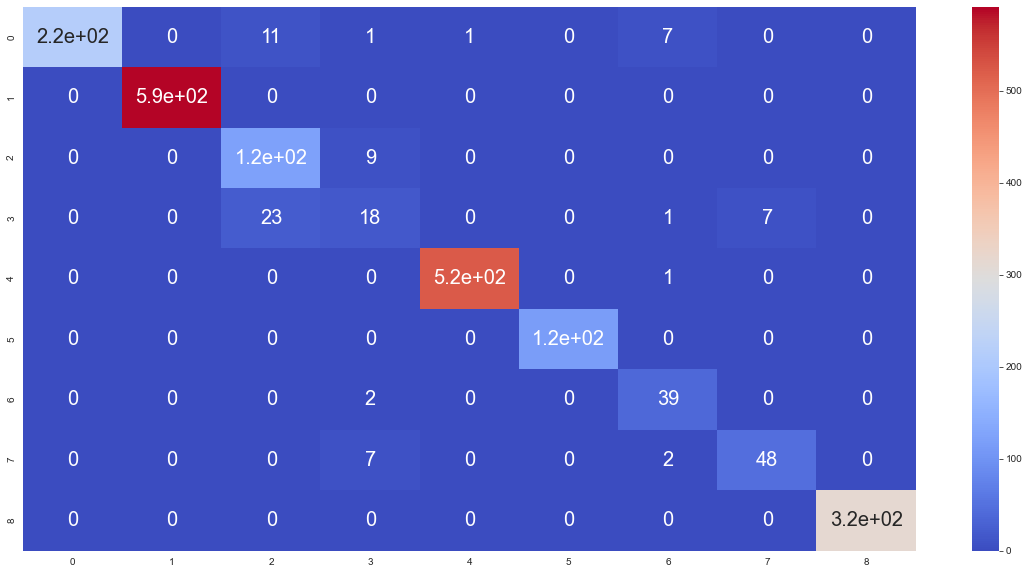



Training score : 1.0000


Test Score : 0.9651


K-fold accuracy : 0.9777


Standard Deviation of Accuracies in k-fold : 0.0027


F1 Score: 0.9643


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       1.00      0.91      0.96       235
      DegreeBranch       1.00      1.00      1.00       591
          EmpScore       0.78      0.93      0.85       132
        Ethinicity       0.49      0.37      0.42        49
            Gender       1.00      1.00      1.00       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       0.78      0.95      0.86        41
     MartialStatus       0.87      0.84      0.86        57
  YearsOfExperince       1.00      1.00      1.00       315

          accuracy                           0.97      2062
         macro avg       0.88      0.89      0.88      2062
      weighted avg       0.97      0.97      0.96      2062








AdaBoostClassifier


Confusion mat

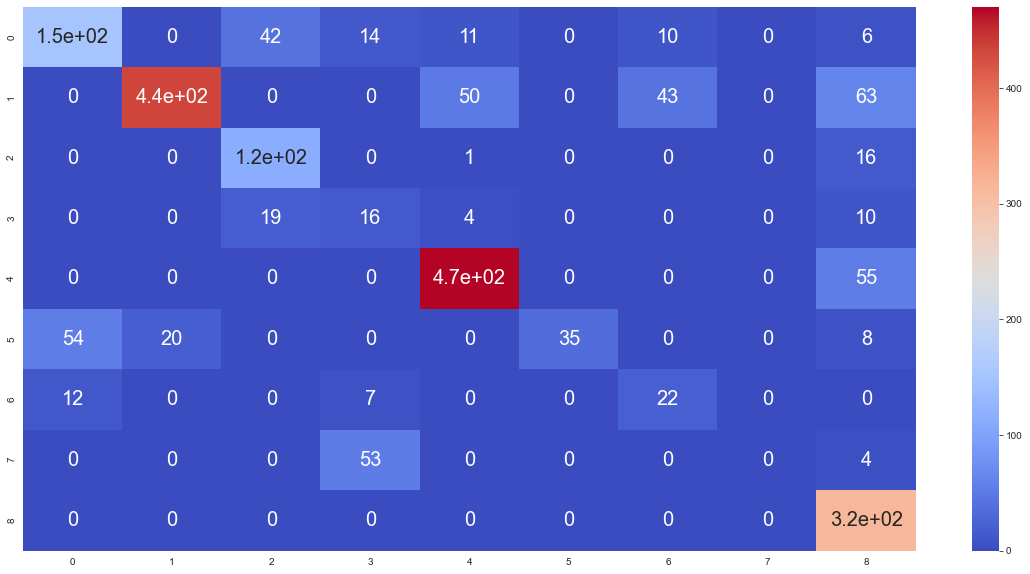



Training score : 0.6125


Test Score : 0.7565


K-fold accuracy : 0.6031


Standard Deviation of Accuracies in k-fold : 0.0297


F1 Score: 0.7489


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.70      0.65      0.67       235
      DegreeBranch       0.96      0.74      0.83       591
          EmpScore       0.65      0.87      0.75       132
        Ethinicity       0.18      0.33      0.23        49
            Gender       0.88      0.90      0.89       525
     HighestDegree       1.00      0.30      0.46       117
  LatestDegreeCGPA       0.29      0.54      0.38        41
     MartialStatus       0.00      0.00      0.00        57
  YearsOfExperince       0.66      1.00      0.80       315

          accuracy                           0.76      2062
         macro avg       0.59      0.59      0.56      2062
      weighted avg       0.79      0.76      0.75      2062








RandomForest


Confusion matrix : 

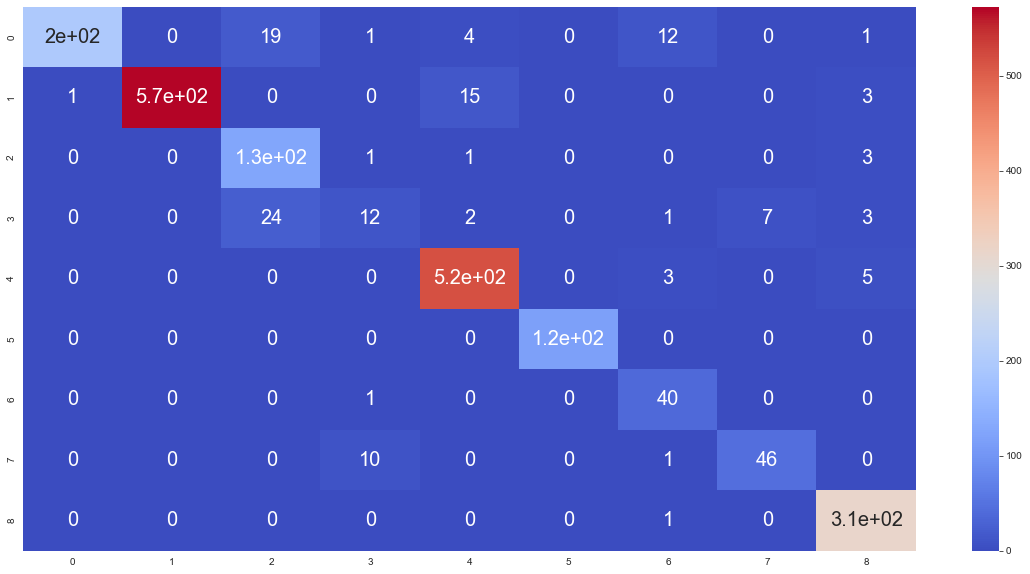



Training score : 1.0000


Test Score : 0.9423


K-fold accuracy : 0.9767


Standard Deviation of Accuracies in k-fold : 0.0056


F1 Score: 0.9398


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.99      0.84      0.91       235
      DegreeBranch       1.00      0.97      0.98       591
          EmpScore       0.75      0.96      0.84       132
        Ethinicity       0.48      0.24      0.32        49
            Gender       0.96      0.98      0.97       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       0.69      0.98      0.81        41
     MartialStatus       0.87      0.81      0.84        57
  YearsOfExperince       0.95      1.00      0.98       315

          accuracy                           0.94      2062
         macro avg       0.85      0.86      0.85      2062
      weighted avg       0.94      0.94      0.94      2062








Logistic Regression


Confusion ma

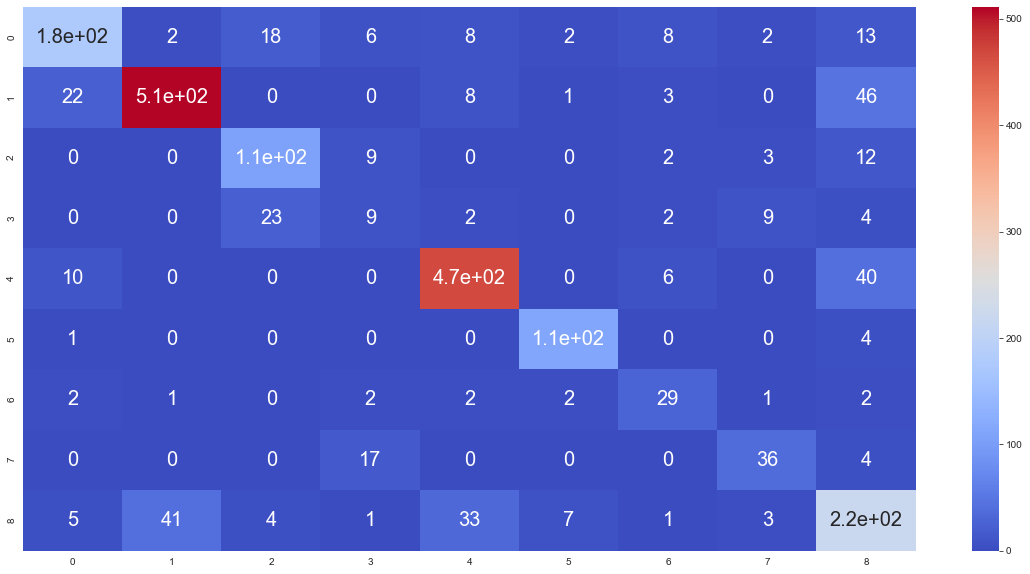



Training score : 0.7987


Test Score : 0.8089


K-fold accuracy : 0.7843


Standard Deviation of Accuracies in k-fold : 0.0239


F1 Score: 0.8103


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.81      0.75      0.78       235
      DegreeBranch       0.92      0.86      0.89       591
          EmpScore       0.70      0.80      0.75       132
        Ethinicity       0.20      0.18      0.19        49
            Gender       0.90      0.89      0.90       525
     HighestDegree       0.90      0.96      0.93       117
  LatestDegreeCGPA       0.57      0.71      0.63        41
     MartialStatus       0.67      0.63      0.65        57
  YearsOfExperince       0.64      0.70      0.67       315

          accuracy                           0.81      2062
         macro avg       0.70      0.72      0.71      2062
      weighted avg       0.81      0.81      0.81      2062








KNeigbors


Confusion matrix : 



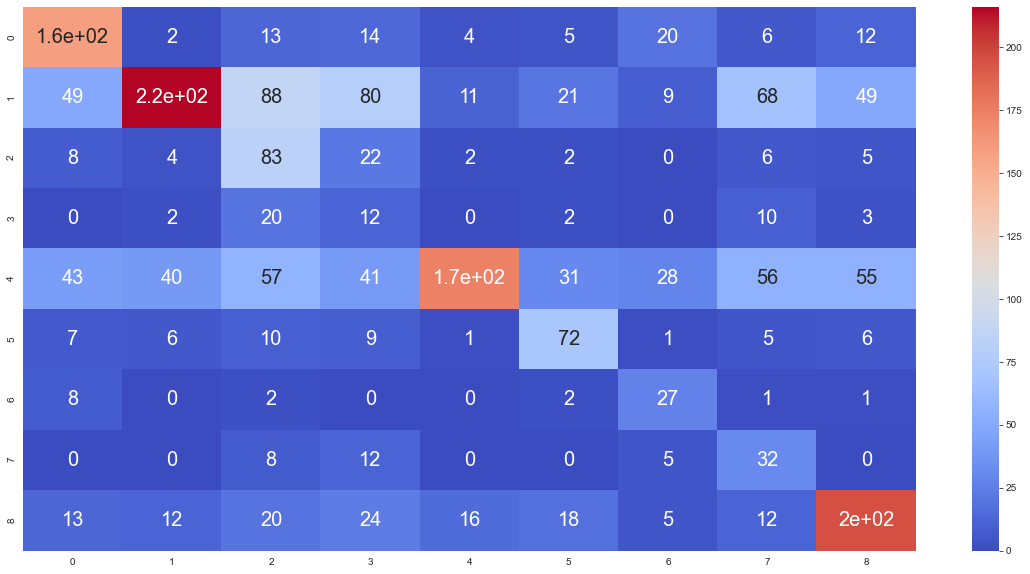



Training score : 0.8846


Test Score : 0.4704


K-fold accuracy : 0.8106


Standard Deviation of Accuracies in k-fold : 0.0173


F1 Score: 0.4969


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       0.55      0.68      0.61       235
      DegreeBranch       0.77      0.37      0.49       591
          EmpScore       0.28      0.63      0.38       132
        Ethinicity       0.06      0.24      0.09        49
            Gender       0.84      0.33      0.47       525
     HighestDegree       0.47      0.62      0.53       117
  LatestDegreeCGPA       0.28      0.66      0.40        41
     MartialStatus       0.16      0.56      0.25        57
  YearsOfExperince       0.60      0.62      0.61       315

          accuracy                           0.47      2062
         macro avg       0.44      0.52      0.43      2062
      weighted avg       0.64      0.47      0.50      2062






Wall time: 7min 53s


In [74]:
%%time

pre_final_1 = []
for i in models:
    sam = metrics(i , X_train_1 , y_train_1 , X_test , y_test)
    pre_final_1.append(sam)

In [75]:
pre_final_1

[(['XGBClassifier',
   0.9999509875998628,
   0.965082444228904,
   0.9777485325340327,
   0.002719935176662301,
   0.9643196144782871],
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
                gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, objective='multi:softprob', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostClassifier',
   0.6125079645150223,
   0.7565470417070805,
   0.6030525213515097,
   0.029669836389438008,
   0.7489055475891705],
  AdaBoostClassifier(random_state=42)),
 (['Rand

In [76]:
data_pre_final_1 = [x[0] for x in pre_final_1]
data_pre_final_1

[['XGBClassifier',
  0.9999509875998628,
  0.965082444228904,
  0.9777485325340327,
  0.002719935176662301,
  0.9643196144782871],
 ['AdaBoostClassifier',
  0.6125079645150223,
  0.7565470417070805,
  0.6030525213515097,
  0.029669836389438008,
  0.7489055475891705],
 ['RandomForest',
  1.0,
  0.9422890397672163,
  0.9767200094148389,
  0.005648592204579131,
  0.9397942979535131],
 ['Logistic Regression',
  0.7986570602362397,
  0.8089233753637245,
  0.784250895850746,
  0.023921900050471255,
  0.8102549854168071],
 ['KNeigbors',
  0.8845757976768123,
  0.47041707080504364,
  0.8105694536511322,
  0.017251531808762054,
  0.49694122244812927]]

In [65]:
pre_final

[(['XGBClassifier',
   1.0,
   0.9762366634335596,
   0.9693234774933804,
   0.004658063793044959,
   0.9750808353854715],
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
                gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, objective='multi:softprob', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostClassifier',
   0.7640354068145992,
   0.7807953443258971,
   0.7286393056781406,
   0.056431842854749725,
   0.7753068261948395],
  AdaBoostClassifier(random_state=42)),
 (['RandomForest',
   

In [66]:
data_pre_final = [x[0] for x in pre_final]
data_pre_final

[['XGBClassifier',
  1.0,
  0.9762366634335596,
  0.9693234774933804,
  0.004658063793044959,
  0.9750808353854715],
 ['AdaBoostClassifier',
  0.7640354068145992,
  0.7807953443258971,
  0.7286393056781406,
  0.056431842854749725,
  0.7753068261948395],
 ['RandomForest',
  1.0,
  0.957807953443259,
  0.9489499852897911,
  0.0045972713643641005,
  0.9523198121530356],
 ['Logistic Regression',
  0.8484297320237663,
  0.8317167798254123,
  0.8303643718740806,
  0.013718161692595106,
  0.8287315119513806],
 ['KNeigbors',
  0.7897417242633685,
  0.6401551891367604,
  0.6327159458664313,
  0.013157822576011932,
  0.619553940525463]]

In [67]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score"])

me.sort_values(by = [ "F1 Score" , "K-fold Accuracy" , "Train Score" , "Test Score"] , inplace = True , ascending = False)
me = me.reset_index(drop = True)
me

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,F1 Score
0,XGBClassifier,1.000000,0.976237,0.969323,0.004658,0.975081
1,RandomForest,1.000000,0.957808,0.948950,0.004597,0.952320
2,Logistic Regression,0.848430,0.831717,0.830364,0.013718,0.828732
3,AdaBoostClassifier,0.764035,0.780795,0.728639,0.056432,0.775307
4,KNeigbors,0.789742,0.640155,0.632716,0.013158,0.619554


In [77]:
me_1 = pd.DataFrame(data_pre_final_1 , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "F1 Score"])

me_1.sort_values(by = [ "F1 Score" , "K-fold Accuracy" , "Train Score" , "Test Score"] , inplace = True , ascending = False)
me_1 = me_1.reset_index(drop = True)
me_1

,Model,Train Score,Test Score,K-fold Accuracy,K-fold Std,F1 Score
0,XGBClassifier,0.999951,0.965082,0.977749,0.002720,0.964320
1,RandomForest,1.000000,0.942289,0.976720,0.005649,0.939794
2,Logistic Regression,0.798657,0.808923,0.784251,0.023922,0.810255
3,AdaBoostClassifier,0.612508,0.756547,0.603053,0.029670,0.748906
4,KNeigbors,0.884576,0.470417,0.810569,0.017252,0.496941


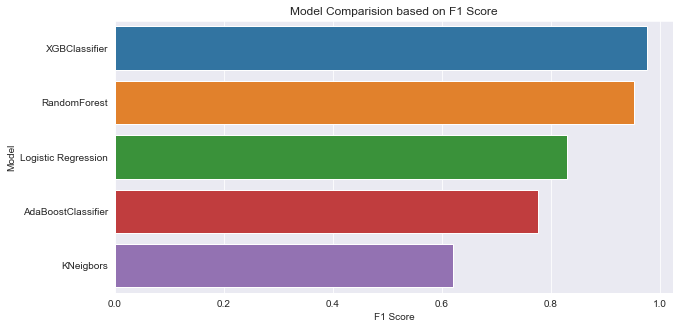

In [68]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "F1 Score" , data = me)
plt.title("Model Comparision based on F1 Score");

In [69]:
from sklearn.model_selection import GridSearchCV


grid_xgb = {"n_estimators" : [100 , 200 , 300]}


grid_ada = {"n_estimators" : [50 , 100 , 200]}


grid_random = {"n_estimators" : [150 , 200 , 250],
              "bootstrap" : [True , False] , 
              "max_features" : ['auto', 'sqrt'] , 
              "min_samples_leaf" : [2, 4] , 
              "class_weight" : ["balanced", "balanced_subsample"]}


grid_linear = {"max_iter" : [100 , 150] , 
              "solver" : ["liblinear"] , 
              "multi_class" : ["ovr"]}


grid_neighbor = {"n_neighbors" : [5 , 7 , 10 , 12] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}

In [70]:
from sklearn.metrics import make_scorer
roc_auc_ovr_scorer = make_scorer(roc_auc_score, needs_proba=True,
                                 multi_class='ovr')

f1_scorer = make_scorer(f1_score , average = "weighted")



XGBClassifier


Best Parameters are : 
 {'n_estimators': 100}


Confusion matrix : 



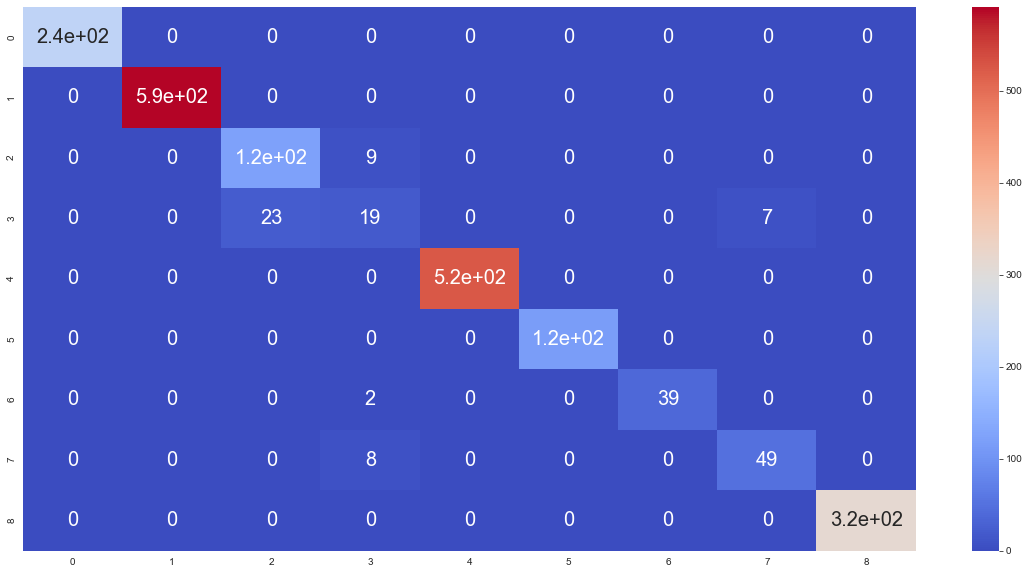



Training score : 1.0000


Test Score : 0.9954


K-fold accuracy : 0.9952


Standard Deviation of Accuracies in k-fold : 0.0013


F1 Score: 0.9751


Classification report : 

                    precision    recall  f1-score   support

CurrentCompanyType       1.00      1.00      1.00       235
      DegreeBranch       1.00      1.00      1.00       591
          EmpScore       0.84      0.93      0.88       132
        Ethinicity       0.50      0.39      0.44        49
            Gender       1.00      1.00      1.00       525
     HighestDegree       1.00      1.00      1.00       117
  LatestDegreeCGPA       1.00      0.95      0.97        41
     MartialStatus       0.88      0.86      0.87        57
  YearsOfExperince       1.00      1.00      1.00       315

          accuracy                           0.98      2062
         macro avg       0.91      0.90      0.91      2062
      weighted avg       0.97      0.98      0.98      2062






Wall time: 25min 42s


In [71]:
%%time

xgb = metrics(['XGBClassifier', GridSearchCV(XGBClassifier(random_state = 42 , eval_metric='mlogloss') , param_grid = grid_xgb, cv = 5, verbose = 0 , scoring = roc_auc_ovr_scorer)] ,  X_train , y_train , X_test , y_test , params = True )

In [81]:
xgb = pre_final[0][1]
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
test.head()

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,FitmentPercent,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,...,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,1.101949,-1.605738,-0.172712,1.060012,1.071380,0.522811,1.090304,0.858740,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1.101949,1.207093,1.218584,1.221419,0.977421,0.522811,-0.676103,1.039868,0,0,...,1,0,0,0,0,0,0,1,0,0
2,-0.653976,1.207093,-1.419977,0.152846,0.107878,-0.349034,1.090304,-0.214165,0,0,...,0,1,0,0,0,1,0,1,0,0
3,1.541023,0.626932,1.074553,-1.870790,-2.138867,1.235160,0.962490,-3.118296,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1.324453,-0.021633,0.104671,0.599814,0.880656,0.522811,-0.427032,-0.071754,1,0,...,0,1,0,0,0,1,0,1,0,0


In [83]:
xgb_preds = xgb.predict(test)

In [84]:
xgb_preds

array(['DegreeBranch', 'DegreeBranch', 'MartialStatus', ...,
       'DegreeBranch', 'CurrentCompanyType', 'LatestDegreeCGPA'],
      dtype=object)

In [85]:
final = pd.DataFrame(xgb_preds , columns = ["Bias"])
final

,Bias
0,DegreeBranch
1,DegreeBranch
2,MartialStatus
3,CurrentCompanyType
4,Gender
...,...
8740,Gender
8741,HighestDegree
8742,DegreeBranch
8743,CurrentCompanyType


In [86]:
final.to_csv("Bias Preds 1.csv")